In [2]:
import pandas as pd
import numpy as np
from gap_statistic import OptimalK
import scipy.spatial.distance as ssd
import itertools
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Importing the test data and estimating the correlation matrix

In [2]:
sp500 = pd.read_csv('./data/sp_500_returns.csv', index_col='Date')

In [3]:
sp500.head()

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,-0.007950,-0.017578,0.023444,0.005374,0.003415,-0.007671,-0.003879,-0.000378,-0.010150,-0.001388,...,-0.017197,-0.006584,-0.010635,0.000233,-0.000283,0.033015,0.006829,-0.013534,-0.007559,0.022063
2012-01-05,0.022382,0.087475,0.006363,0.011102,0.007592,0.008835,-0.002301,-0.019082,0.007072,0.004447,...,-0.010446,0.004418,0.008880,-0.003022,0.000848,-0.014247,0.007631,0.011840,-0.001410,0.028005
2012-01-06,0.010811,0.023766,0.004637,0.010454,0.002598,-0.007116,-0.009047,-0.001733,0.008427,-0.006641,...,-0.035186,-0.002933,-0.006486,-0.007463,-0.005932,-0.016797,0.007237,0.002600,-0.008192,0.001135
2012-01-09,0.026203,0.021429,-0.000280,-0.001586,-0.000518,0.003859,-0.000179,-0.001736,-0.006616,0.019499,...,-0.002805,0.000735,0.021759,0.004464,-0.004831,0.003973,-0.003843,0.007410,-0.004557,0.013605
2012-01-10,0.018760,0.000000,0.000839,0.003580,0.011408,-0.002746,0.004655,0.017201,0.023484,0.004372,...,0.008346,0.008082,0.001825,0.002573,0.014278,0.012267,0.006206,0.020964,0.009156,0.016219


In [3]:
psi20 = pd.read_csv('./data/psi_20_returns.csv', index_col='Date')

In [4]:
E_matrix = np.corrcoef(psi20.T)

In [5]:
E_matrix.shape

(16, 16)

To be able to pass the distance matrix to the ssd funciton (which transforms the distance matrix to a condensed form) it's necessary to round the entries of the matrix first in order to prevent a validation error regarding the symmetry of the matrix.

In [6]:
D_matrix = np.sqrt(2*(1- E_matrix))
D_matrix = np.around(D_matrix, decimals=7)

In [7]:
D_matrix.shape

(16, 16)

To be able to pass this custom distance matrix to the scipy clustering function, it's necessary to obtain the matrix in condensed form (more info here: https://stackoverflow.com/questions/18952587/use-distance-matrix-in-scipy-cluster-hierarchy-linkage)

In [8]:
D_condensed = ssd.squareform(D_matrix)

In [9]:
D_condensed.shape

(120,)

# Getting the optimal number of clusters via GAP Statistic

In [6]:
optimalK = OptimalK()

In [8]:
n_clusters = optimalK(sp500, cluster_array=np.arange(10, 30))
n_clusters

25

In [9]:
optimalK(D_matrix, cluster_array=np.arange(10,30))

27

In [11]:
optimalK(D_matrix, cluster_array=np.arange(10,35))

34

# Implementing the hierarchical agglomerative clustering 

In [10]:
Z = linkage(D_condensed, 'ward', optimal_ordering = True)

In [20]:
psi20.columns[[8,13,3,4]]

Index(['JMT.LS', 'RENE.LS', 'EDP.LS', 'EDPR.LS'], dtype='object')

3, 10, 13 y 8 (COR.LS, NBA.LS, PHR.LS, IBS.LS)

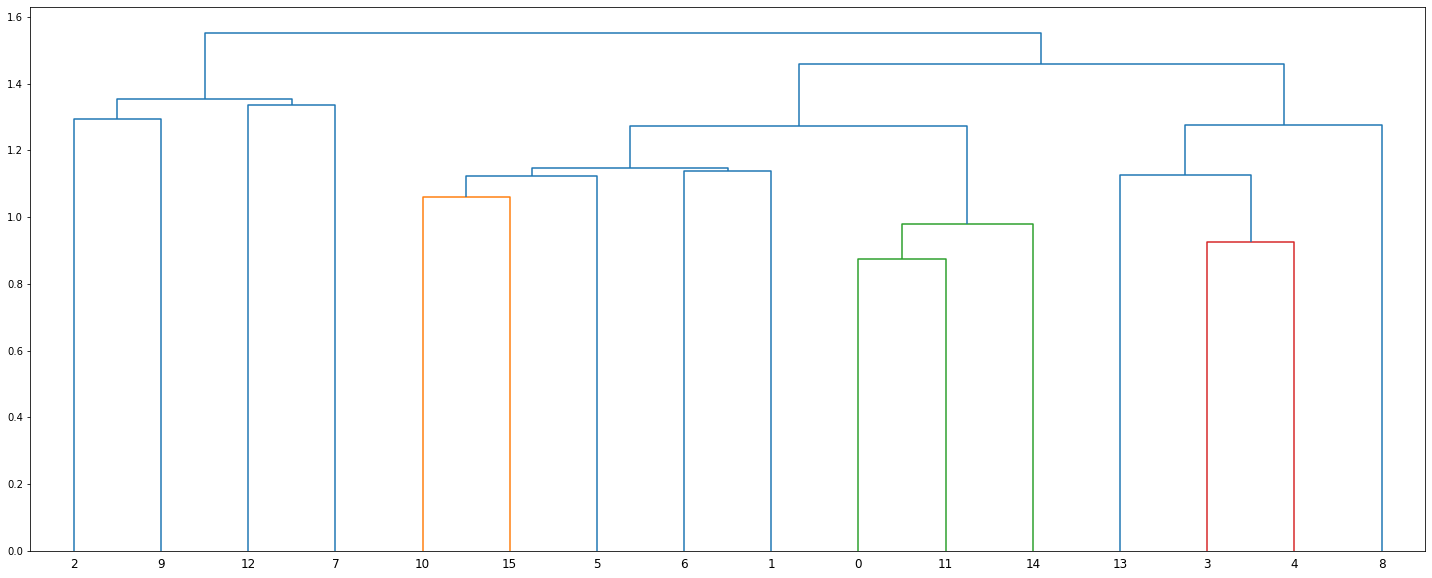

In [11]:
fig = plt.figure(figsize=(25, 10))
#dn = dendrogram(Z, p = 4, truncate_mode='level')
dn = dendrogram(Z)

In [52]:
labels = fcluster(Z, 25, criterion="maxclust")

In [53]:
np.unique(labels, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25], dtype=int32),
 array([19,  5, 26, 20, 21, 43,  9, 14, 11, 17, 14,  5, 13,  5, 46, 27, 12,
        38, 13, 28, 11, 15, 17, 12, 19]))

In [54]:
labels_order = labels.argsort()

In [56]:
sp500.columns.values[labels == 24]

array(['ADBE', 'AMZN', 'ANSS', 'CDNS', 'CRM', 'GOOG', 'GOOGL', 'INTU',
       'MSFT', 'SNPS', 'TYL', 'VRSN'], dtype=object)

In [57]:
sp500.columns.values.shape

(460,)

In [58]:
import bs4 as bs
import requests

In [59]:
resp = requests.get('https://en.wikipedia.org/w/index.php?title=List_of_S%26P_500_companies&oldid=1062834329')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
sp500_tabla = pd.read_html(str(table))[0]

In [60]:
tickers_sp = list(sp500_tabla.sort_values('GICS Sector')['Symbol'])
sectors_sp = list(sp500_tabla.sort_values('GICS Sector')['GICS Sector'])
tickers_sp[tickers_sp.index('BF.B')] = 'BF-B'
tickers_sp[tickers_sp.index('BRK.B')] = 'BRK-B'

In [61]:
sectors_selected = []
for tick in sp500.columns.values:
    index = tickers_sp.index(tick)
    sectors_selected.append(sectors_sp[index])

In [62]:
sectors_selected= np.array(sectors_selected)

In [64]:
d = {'ticker': sp500.columns.values[labels_order[::-1]], 'sector': sectors_selected[labels_order[::-1]], 'label': labels[labels_order[::-1]]}
df = pd.DataFrame(data=d)

In [67]:
df.sort_values('label').iloc[200:250]

,ticker,sector,label
256,CI,Health Care,12
259,HUM,Health Care,12
260,ANTM,Health Care,12
258,UNH,Health Care,12
244,HST,Real Estate,13
245,CCL,Consumer Discretionary,13
246,MGM,Consumer Discretionary,13
247,RCL,Consumer Discretionary,13
248,EXPE,Consumer Discretionary,13
243,WYNN,Consumer Discretionary,13


In [83]:
df[df['label'] == 25]

,ticker,sector,label
0,EA,Communication Services,25
1,DXCM,Health Care,25
2,ATVI,Communication Services,25
3,TTWO,Communication Services,25
4,TSLA,Consumer Discretionary,25
5,TMUS,Communication Services,25
6,CTXS,Information Technology,25
7,DPZ,Consumer Discretionary,25
8,NFLX,Communication Services,25
9,AKAM,Information Technology,25


In [42]:
model.distances_.shape

(459,)

In [52]:
model.children_.shape

(459, 2)

In [ ]:
model.children_[]

In [56]:
aber = []

for i,j in model.children_:
    aber.append(i)

In [62]:
(np.array(aber) < 500).sum()

295

In [67]:
ii = itertools.count(D_matrix.shape[0])
clusters = [{'node_id': next(ii), 'left': x[0], 'right':x[1]} for x in model.children_]

In [68]:
import copy
n_points = D_matrix.shape[0]
members = {i:[i] for i in range(n_points)}
for cluster in clusters:
    node_id = cluster["node_id"]
    members[node_id] = copy.deepcopy(members[cluster["left"]])
    members[node_id].extend(copy.deepcopy(members[cluster["right"]]))

on_split = {c["node_id"]: [c["left"], c["right"]] for c in clusters}
up_merge = {c["left"]: {"into": c["node_id"], "with": c["right"]} for c in clusters}
up_merge.update({c["right"]: {"into": c["node_id"], "with": c["left"]} for c in clusters})

In [70]:
up_merge

{186: {'into': 460, 'with': 187},
 125: {'into': 461, 'with': 126},
 176: {'into': 462, 'with': 352},
 172: {'into': 463, 'with': 236},
 96: {'into': 464, 'with': 451},
 43: {'into': 465, 'with': 415},
 151: {'into': 466, 'with': 465},
 253: {'into': 467, 'with': 343},
 354: {'into': 468, 'with': 463},
 192: {'into': 469, 'with': 287},
 246: {'into': 470, 'with': 332},
 262: {'into': 471, 'with': 423},
 25: {'into': 472, 'with': 256},
 395: {'into': 473, 'with': 422},
 153: {'into': 474, 'with': 466},
 337: {'into': 475, 'with': 473},
 71: {'into': 476, 'with': 234},
 13: {'into': 477, 'with': 254},
 91: {'into': 478, 'with': 196},
 432: {'into': 479, 'with': 440},
 194: {'into': 480, 'with': 373},
 272: {'into': 481, 'with': 467},
 75: {'into': 482, 'with': 404},
 132: {'into': 483, 'with': 335},
 122: {'into': 484, 'with': 470},
 59: {'into': 485, 'with': 381},
 152: {'into': 486, 'with': 464},
 277: {'into': 487, 'with': 427},
 363: {'into': 488, 'with': 444},
 79: {'into': 489, 'wi

In [54]:
model.children_

array([[186, 187],
       [125, 126],
       [176, 352],
       [172, 236],
       [ 96, 451],
       [ 43, 415],
       [151, 465],
       [253, 343],
       [354, 463],
       [192, 287],
       [246, 332],
       [262, 423],
       [ 25, 256],
       [395, 422],
       [153, 466],
       [337, 473],
       [ 71, 234],
       [ 13, 254],
       [ 91, 196],
       [432, 440],
       [194, 373],
       [272, 467],
       [ 75, 404],
       [132, 335],
       [122, 470],
       [ 59, 381],
       [152, 464],
       [277, 427],
       [363, 444],
       [ 79, 350],
       [ 99, 119],
       [135, 376],
       [161, 344],
       [149, 348],
       [283, 426],
       [237, 462],
       [328, 481],
       [108, 305],
       [  9, 267],
       [ 50, 476],
       [477, 486],
       [143, 439],
       [114, 453],
       [137, 286],
       [307, 485],
       [155, 339],
       [269, 378],
       [116, 414],
       [ 70, 428],
       [252, 303],
       [ 11, 320],
       [291, 321],
       [ 19,